In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'xtick.color':'w','ytick.color':'w','axes.labelcolor':'gold'})
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [3]:
data = load_iris() # データをロード
X = data.data      # 特徴量
y = data.target    # ラベル

In [4]:
clf = linear_model.LogisticRegression() # ロジスティック識別器を作成

In [5]:
ss = ShuffleSplit(n_splits=10,train_size=0.8,test_size=0.2,random_state=0)

In [8]:
scores = []
#index だけを入れて、ループの中でx_train,x_test,y_train,y_testを作成する。
for train_index,test_index in ss.split(X):
    X_train,y_train = X[train_index],y[train_index]
    X_test,y_test = X[test_index],y[test_index]
    
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    scores.append(score)

/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/humu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [23]:

print(scores,pd.Series(scores).describe())

[0.96666667 1.         0.9        1.         1.         0.93333333
 0.96666667 0.96666667 1.         0.96666667] count    10.000000
mean      0.970000
std       0.033148
min       0.900000
25%       0.966667
50%       0.966667
75%       1.000000
max       1.000000
dtype: float64


平均と標準偏差を出す。

In [24]:
#list obj をnp array objにして統計処理を可能にする



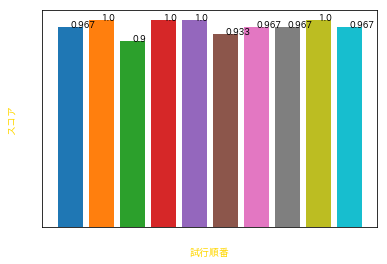

In [44]:

for i,score in enumerate(list(scores)):
    # xが回数　y がパーセンテージ
    # legend が回数
    # ラベル あり
    #
    plt.bar(i,score)
    score =  round(score,3)
    plt.text(i, score, score,fontsize=9,fontweight='bold')
    plt.xlabel('試行順番')
    plt.ylabel('スコア')

In [30]:
scores = np.array(scores)
print("{0} +/- {1}%".format(scores.mean() * 100,scores.std() * 100))

97.00000000000001 +/- 3.1446603773522006%
